In [1]:
import numpy as np

import rlkit.torch.pytorch_util as ptu
from rlkit.data_management.obs_dict_replay_buffer import ObsDictReplayBuffer
from rlkit.misc.wx250_utils import add_data_to_buffer_real_robot, DummyEnv

import matplotlib.pyplot as plt
import os
gpu_id = 0
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)
ptu.set_gpu_mode(True)

In [2]:
BUFFER_PATH = "/home/jonathan/Desktop/robonetv2/trainingdata/merged_multitask_4_objects/combined_2021-07-06_19_15_30_object_Bear.pkl"

In [4]:
expl_env = DummyEnv(image_size=64, use_wrist=True)
replay_buffer = ObsDictReplayBuffer(
    int(1E6),
    expl_env,
    observation_keys=['image', 'state']
)
add_data_to_buffer_real_robot(BUFFER_PATH, replay_buffer)

replay_buffer._size 31875


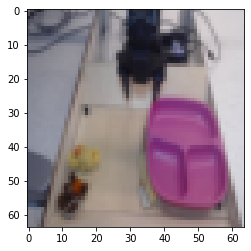

In [6]:
obs = replay_buffer._obs['image'][0]
plt.imshow(obs.reshape(3, 64, 64).transpose((1, 2, 0)))

In [7]:
success_idxs = []
for i in range(10000):
    if replay_buffer._rewards[i] == 1:
        success_idxs.append(i)

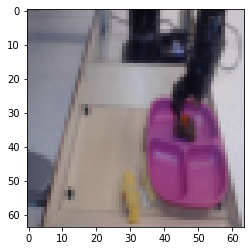

In [9]:
obs = replay_buffer._obs['image'][success_idxs[10]]
plt.imshow(obs.reshape(3, 64, 64).transpose((1, 2, 0)))